In [2]:
import ast
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

from gensim import corpora
import gensim
import pyLDAvis
from gensim.models import CoherenceModel

In [8]:
# token_docs : 형태소가 들어있는 text 파일
for i, token in enumerate(token_docs):
    token_docs[i] = ast.literal_eval(token.replace('\n', ''))
token_docs[0]

['좋다']

In [10]:
dictionary = corpora.Dictionary(token_docs)
corpus = [dictionary.doc2bow(text) for text in token_docs]


In [ ]:
topic_num = range(1, 50)

coherence_path = './find_topic_num/coherence_values.txt'
perplexity_path = './find_topic_num/perplexity_values.txt'
# 결과 저장
coherence_values = []
perplexity_values = []
for i in tqdm(topic_num):

    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, passes=20, random_state=777)
    
    # coherence 측정
    coherence_model_lda = CoherenceModel(model = ldamodel, texts=token_docs, dictionary=dictionary, topn=10)
    coherence_value=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_value)
    # 저장
    file_coherence = open(coherence_path, 'a', encoding='utf-8')
    file_coherence.write( f'{i}, {coherence_value}' + '\n' )
    file_coherence.close()
    
    
    # perplexity 측정
    perplexity_value = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_value)
    # 저장
    file_perplexity = open(perplexity_path, 'a', encoding='utf-8')
    file_perplexity.write( f'{i}, {perplexity_value}' + '\n' )
    file_perplexity.close()
    

 51%|█████     | 25/49 [2:41:52<2:33:03, 382.66s/it]

---

In [ ]:
import ast
import matplotlib.pyplot as plt

# coherence
- 높을수록  Good

## models.coherencemodel 주제 모델에 대한 주제 일관성을 계산

### coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
- model :주제가 제공되지 않은 경우 사전 훈련 된 주제 모델을 제공해야합니다. 현재 지원 LdaModel, LdaMulticore, LdaMallet와 LdaVowpalWabbit.
- topics(list of list of str, optional) :토큰 화 된 토픽의 목록
- texts (list of list of str, optional) :슬라이딩 창 기반 (예 : coherence =c_something) 확률 추정기를 사용하는 일관성 모델에 필요한 토큰 화 된 텍스트.
- corpus (iterable of list of (int, number), optional) :BoW 형식의 코퍼스.
- dictionary (Dictionary, optional) : Gensim dictionary mapping of id word to create corpus. If model.id2word is present, this is not needed. If both are provided, passed dictionary will be used.
- coherence ({'u_mass', 'c_v', 'c_uci', 'c_npmi'}, optional) :
- topn (int, optional) : 각 주제에서 추출 할 최상위 단어 수에 해당하는 정수
- processes (int, optional) : 확률 추정 단계에 사용할 프로세스 수

In [ ]:
for i, value in enumerate( coherence_values ):
    print(f'Topic_Num {i+1} : {value}')

Topic_Num 0 : 0.1269098835761811
Topic_Num 1 : 0.300111414002554
Topic_Num 2 : 0.31700960029860165
Topic_Num 3 : 0.317432840960049
Topic_Num 4 : 0.35376472710955886
Topic_Num 5 : 0.3467065183845524
Topic_Num 6 : 0.3527137322310824
Topic_Num 7 : 0.3532528006050341
Topic_Num 8 : 0.36161741592145646
Topic_Num 9 : 0.34566353280035655
Topic_Num 10 : 0.3224336442656817
Topic_Num 11 : 0.3325160637519338
Topic_Num 12 : 0.3154567358271679
Topic_Num 13 : 0.34957112680584634
Topic_Num 14 : 0.3345131104452838
Topic_Num 15 : 0.2966935875017581
Topic_Num 16 : 0.31694282506910676
Topic_Num 17 : 0.31947806313693383
Topic_Num 18 : 0.3304815825566754
Topic_Num 19 : 0.2994223214939053
Topic_Num 20 : 0.31890316505098093
Topic_Num 21 : 0.3126004777815404
Topic_Num 22 : 0.30938176759171904
Topic_Num 23 : 0.32400869815714267
Topic_Num 24 : 0.31971952345138904
Topic_Num 25 : 0.32374415233390036
Topic_Num 26 : 0.3355688027974973
Topic_Num 27 : 0.3128630174165979
Topic_Num 28 : 0.35157302517114597
Topic_Num 29 

In [ ]:
coherence_values[17:25]

[0.31947806313693383,
 0.3304815825566754,
 0.2994223214939053,
 0.31890316505098093,
 0.3126004777815404,
 0.30938176759171904,
 0.32400869815714267,
 0.31971952345138904]

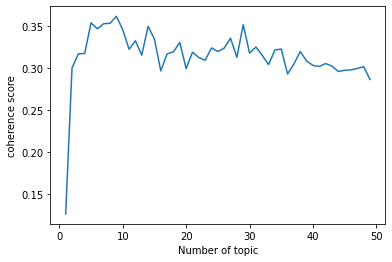

In [ ]:
topic_num = range(1, len(coherence_values)+1)
plt.plot(topic_num, coherence_values)
plt.xlabel('Number of topic')
plt.ylabel('coherence score')   
plt.show()

# plt.savefig('./find_topic_num/coherence.png', dpi=100)

In [ ]:
# 일부만 확인하고 싶을 때
topic_num = range(40, 48)

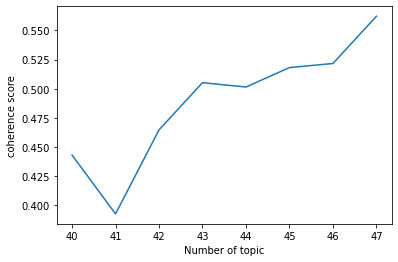

In [ ]:
plt.plot(topic_num, coherence_values[ 40 : 48 ])
plt.xlabel('Number of topic')
plt.ylabel('coherence score')   
plt.show()

# plt.savefig('./find_topic_num/coherence.png', dpi=100)

##### 토픽 개수에 따른 coherence 찾기

In [ ]:
for i in range(len(coherence_values))[40:48]:
    print(f'Topic_Num {i+1} :  {coherence_values[i]}')

Topic_Num 40 :  0.4432058405866111
Topic_Num 41 :  0.39278904287483224
Topic_Num 42 :  0.4647554583796575
Topic_Num 43 :  0.5052214849304708
Topic_Num 44 :  0.5014747500320605
Topic_Num 45 :  0.5181399986167432
Topic_Num 46 :  0.5216348610813485
Topic_Num 47 :  0.5621132286618841


In [ ]:
chk = 0
for idx, val in enumerate(coherence_values[:25]):
    if val > chk:
        chk = val
        chk_idx = idx
print(chk_idx, chk)

2 0.5883430553649455


topic_num=15

# perplexity
- 낮을 수록 Good

In [ ]:
len(perplexity_values), perplexity_values

(49,
 [-5.929622050715949,
  -6.000388881021191,
  -6.063108216316455,
  -6.157106642798321,
  -6.232091380073188,
  -6.317391929013839,
  -6.422679104494965,
  -6.531750599200784,
  -6.704391016077395,
  -6.910727476460146,
  -7.150199734918126,
  -7.423340097512044,
  -7.849366941809052,
  -8.295846046817438,
  -8.780942997348497,
  -9.16830545991023,
  -9.530586680471762,
  -9.760071999357097,
  -10.055395775832755,
  -10.226830106426432,
  -10.496559268992357,
  -10.705476489022052,
  -10.931134154890755,
  -11.123817119455113,
  -11.311315841160026,
  -11.541085001644186,
  -11.776041498359623,
  -12.028558279438036,
  -12.29598734832759,
  -12.60143145087796,
  -12.809932847377151,
  -13.110991352055915,
  -13.421631820167388,
  -13.644941705875517,
  -13.901031797803395,
  -14.114109445287736,
  -14.405194872784072,
  -14.674776008329799,
  -14.938546106224555,
  -15.215116033313926,
  -15.547884036094704,
  -15.965015181363109,
  -16.24138557387653,
  -16.413610242055388,
  -16

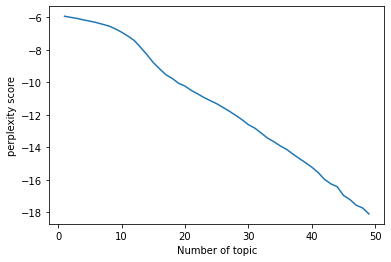

In [ ]:
topic_num = range(1, len(perplexity_values)+1)

plt.plot(topic_num, perplexity_values)
plt.xlabel('Number of topic')
plt.ylabel('perplexity score')   
plt.show()

# plt.savefig('./find_topic_num/coherence.png', dpi=100)